In [2]:
import pandas as pd
import numpy as np
import warnings

In [3]:
beml_df = pd.read_csv('BEML.csv')
beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [4]:
glaxo_df = pd.read_csv('GLAXO.csv')
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [5]:
beml_df = beml_df[['Date','Close']]
glaxo_df = glaxo_df[['Date','Close']]

In [6]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [7]:
beml_df.head(5)

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

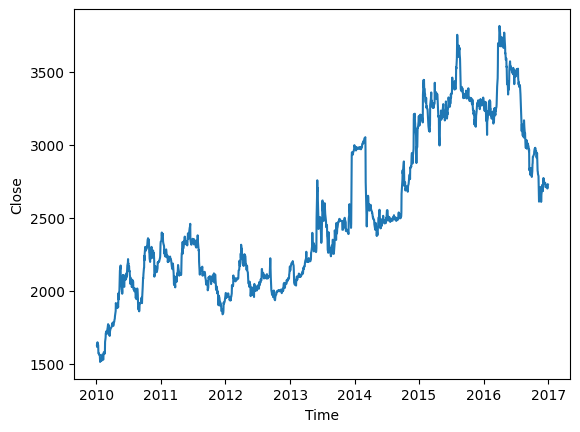

In [9]:
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

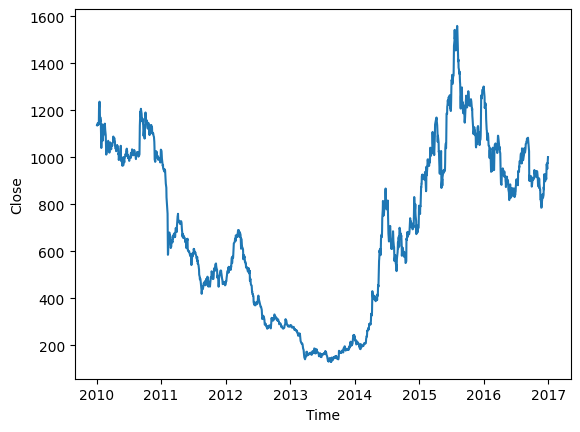

In [10]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

In [11]:
# pct.change() in pandas will give % change in a column value shifted by a period, which is passed as a parameter 'periods',
# periods = 1 indicates the value change since last row (previous day),

glaxo_df['Gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['Gain'] = beml_df.Close.pct_change(periods = 1)
glaxo_df.head(5)

,Date,Close,Gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398


In [12]:
# NAN values can be droped by dropna() method;
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

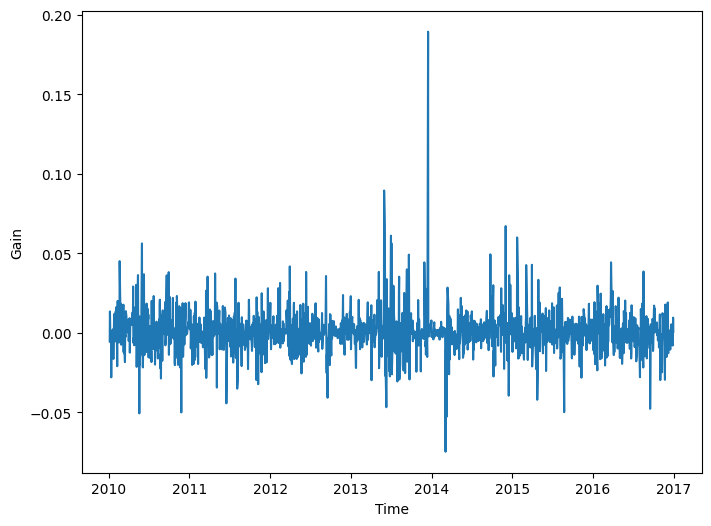

In [13]:
plt.figure(figsize = (8,6));
plt.plot(glaxo_df.index, glaxo_df.Gain);
plt.xlabel('Time');
plt.ylabel('Gain');

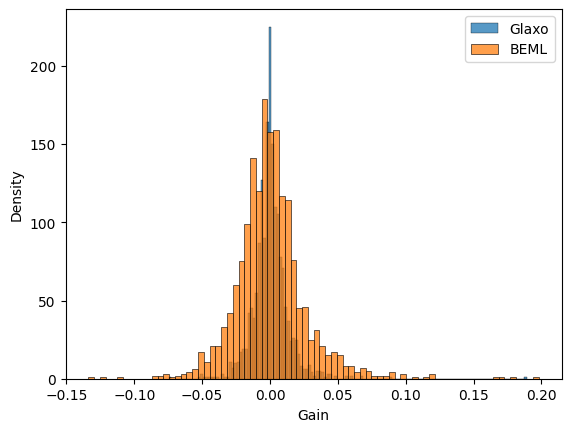

In [14]:
sns.histplot(glaxo_df.Gain, label = 'Glaxo');
sns.histplot(beml_df.Gain, label = 'BEML');
plt.xlabel('Gain');
plt.ylabel('Density');
plt.legend();

In [15]:
beml_df.Gain.describe()

count    1738.000000
mean        0.000271
std         0.026431
min        -0.133940
25%        -0.013736
50%        -0.001541
75%         0.011985
max         0.198329
Name: Gain, dtype: float64

In [16]:
glaxo_df.Gain.describe()

count    1738.000000
mean        0.000386
std         0.013361
min        -0.074719
25%        -0.005850
50%        -0.000021
75%         0.005826
max         0.189196
Name: Gain, dtype: float64

## CONFIDENCE INTERVAL

In [18]:
from scipy import stats
glaxo_df_ci = stats.norm.interval(0.95, loc = glaxo_df.Gain.mean(), scale = glaxo_df.Gain.std())
print("Gain at 95% CI is : ", np.round(glaxo_df_ci, 4))

Gain at 95% CI is :  [-0.0258  0.0266]


In [19]:
beml_df_ci = stats.norm.interval(0.95, beml_df.Gain.mean(), beml_df.Gain.std())
print("Gain at 95% CI: ", np.round(beml_df_ci, 4))

Gain at 95% CI:  [-0.0515  0.0521]


### Cumulative Probability Distribution

In [43]:
print("Probability of making 2% loss or higher in Glaxo: ")
stats.norm.cdf(-0.02, loc = glaxo_df.Gain.mean(), scale = glaxo_df.Gain.std())

Probability of making 2% loss or higher in Glaxo: 


0.06352488667177401

In [45]:
print("Probability of making 2% loss or higher in Beml: ")
stats.norm.cdf(-0.02, loc = beml_df.Gain.mean(), scale = beml_df.Gain.std())

Probability of making 2% loss or higher in Beml: 


0.22155987503755292